In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

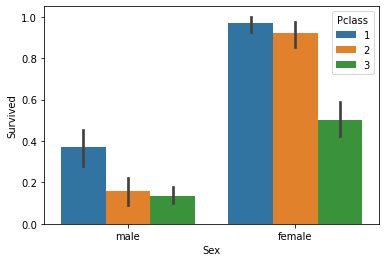

In [3]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

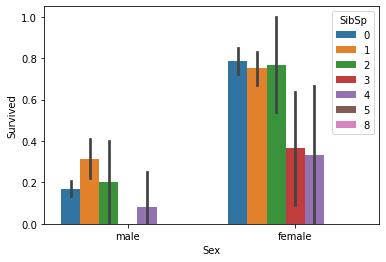

In [4]:
sns.barplot(x="Sex", y="Survived", hue="SibSp", data=train)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

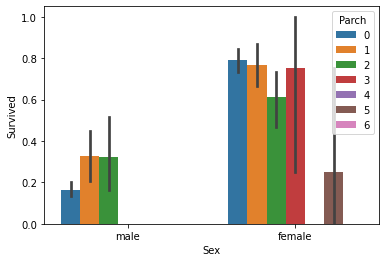

In [5]:
sns.barplot(x="Sex", y="Survived", hue="Parch", data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

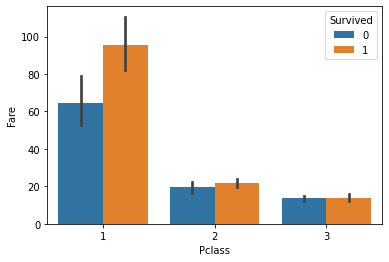

In [6]:
sns.barplot(x="Pclass", y="Fare", hue="Survived", data=train)

In [7]:
from sklearn.preprocessing import LabelEncoder

# 性別の数値化
sex_le = LabelEncoder()
sex_le.classes_ = ['male', 'female']
train['Sex'] = sex_le.transform(train['Sex'])

In [8]:
train_y = train['Survived']
train_X = train[['Sex', 'Pclass', 'Fare']]
test_X = test[['Sex', 'Pclass', 'Fare']]

In [10]:
from sklearn.linear_model import LogisticRegression

# モデルを指定
model = LogisticRegression(random_state=42)

# sklearnは基本的にどのモデルでも fit() で訓練を行うことができます
model.fit(train_X, train_y)

LogisticRegression(random_state=42)

In [11]:
from sklearn.metrics import accuracy_score

# 学習したモデルを使って「学習中に既に見た学習データ」と「未知の検証データ」に対して予測を行なってみます
pred = model.predict(train_X)
print("train data acc:", accuracy_score(train_y, pred))

train data acc: 0.7867564534231201


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
    "penalty": ["l2"], 
    "C": [0.1, 1, 10, 100, 1000],
    "solver": ["newton-cg", "sag", "saga", "lbfgs"],
    "multi_class": ("ovr", "multinomial")
    }

# model = GridSearchCV(LogisticRegression(random_state=42), params)
model = GridSearchCV(LogisticRegression(random_state=42, class_weight="balanced", max_iter=10000), params)
model.fit(train_X, train_y)
print(model.best_score_)
print(model.best_params_)

0.7699704977716402
{'C': 10, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}
